# Project - Text Classification [sentiment Analysis]

## Dataset:
Public dataset downloaded from kaggle.This IMDB dataset having 50K movie reviews for natural language processing or Text analytics.This is a dataset for binary sentiment classification, a set of 25,000 highly polar movie reviews for training and 25,000 for testing.
## Goal:
Predict the number of positive and negative reviews using either classification or deep learning algorithms.



In [54]:
#import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  classification_report
#
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense,Embedding,LSTM,Bidirectional,GRU,Flatten,Dropout,SpatialDropout1D,BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#
import re
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
import pickle
import os
from collections import Counter
from bs4 import BeautifulSoup
import re,string,unicodedata

In [3]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [4]:
#Read the Dataset to pandas Dataframe
data_path ="/home/paul/aiml-workspace/notebooks/Datasets/archive/IMDB Dataset.csv"
movie_df = pd.read_csv(data_path)
#To see the column values without trucation
pd.set_option('display.max_colwidth', None)
#display the first five rows
movie_df.head(5)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

## Exploratory Data Analysis

In [5]:
movie_df.shape

(50000, 2)

In [6]:
movie_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",negative
freq,5,25000


In [7]:
movie_df.isnull().any()

review       False
sentiment    False
dtype: bool

In [8]:
num_duplicates = movie_df.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

There are 418 duplicate reviews present in the dataset


In [9]:
# duplicate reviews
review = movie_df['review']
duplicate_review = movie_df[review.isin(review[review.duplicated()])].sort_values("review")
duplicate_review.head()

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wrongly the reputation of a film maker with much promise.<br /><br />Its then hard to understand how she could turn out a movie made up of stereotypes that one associates with inferior sitcoms. The entire film rings hollow. I cringed the whole way through.<br /><br />Its supposed to be a look into nineties human sexuality. Well not much more here to be learned than from ""In and Out"". By now most of us actually do know, that there are men who are sexually attracted to women and there men who are sexually attracted to men and there are even men sexually attracted to both sexes. <br /><br />Seldom has this revelation been portrayed on the screen with so little wit and style.<br /><br />Pathetic.",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wrongly the reputation of a film maker with much promise.<br /><br />Its then hard to understand how she could turn out a movie made up of stereotypes that one associates with inferior sitcoms. The entire film rings hollow. I cringed the whole way through.<br /><br />Its supposed to be a look into nineties human sexuality. Well not much more here to be learned than from ""In and Out"". By now most of us actually do know, that there are men who are sexually attracted to women and there men who are sexually attracted to men and there are even men sexually attracted to both sexes. <br /><br />Seldom has this revelation been portrayed on the screen with so little wit and style.<br /><br />Pathetic.",negative
29956,"""Three"" is a seriously dumb shipwreck movie. Masquerading as a psychological thriller, it's closest relative is the monumentally superior ""Dead Calm"" (also featuring Billy Zane). ""Dead Calm"" provided well drawn characters to root for in the form of Sam Neil and Nicole Kidman's grieving parents attempting to re-define their relationship on an ocean cruise. They end up being terrorised by Zane's adrift psycho-killer. It provided sharp, increasingly ratcheted suspense, a scary feeling of claustrophobia in open seas as the cat and mouse game of life and death unfolded.<br /><br />""Three"" suffers from poorly drawn characterisation (the audience doesn't care what happens to any of them), a stupid and unnecessary voodoo plot device, a total lack of suspense or excitement and some thudding, hammy performances from the principal players. Zane in particular goes way over the top in an irritatingly mannered fashion. In ""Dead Calm"" he was menacing, wired and seething with barely controlled sexual violence. Here he is bombastic, petulant slimy, and unravelled. And where does he get his seemingly inexhaustible supply of dry cigarettes and cigars? And how come his lighter stays full of juice for over a year? Ms Brook is very picturesque, stunningly pretty, but both her chest and rear appear to have been wildly over-inflated by some sort of life-raft pump. They do, however, succeed in acting with more skill and conviction than the rest of her. Dramatic actress, in the purest sense of the term, she is not. The guy playing the voodoo-hexed Manuel, the third component of this sorry triangle, could have been replaced by a lump of driftwood - no one would notice. In fact, judging by his complete lack of ability to deliver dialogue in any meaningful or dynamic way, driftwood represents a potential improvement in the casting stakes (excuse pun).<br /><br />Plus sides: the scenery is nice and the cinematography (above and below the water) is credible.<br /><br />I'm guessing this had a very limited (if any) theatrical release or went straight to rental and retail DVD. The reason for this is it's not very good. If you want something decent along these lines, get ""Dead Calm."" It was made by people who knew a bit about cinema.",negative
31488,"""Three"" is a seriously dumb shipwreck movie. Masquerading as a psychological thriller, it's closest relative is the monumentally superior ""Dead Calm"" (also featuring Billy 

In [10]:
#drop duplicate reviews
movie_df.drop_duplicates(inplace = True)

In [11]:
print('The dataset contains {} rows and {} columns after removing duplicates'.format(movie_df.shape[0],movie_df.shape[1]))

The dataset contains 49582 rows and 2 columns after removing duplicates


In [12]:
#calculate length of the reviews
movie_df['review_len'] = movie_df['review'].astype(str).apply(len)
print ('Maximum length of single record of review:', movie_df['review_len'].max())
print ('Minimum length of single record of review:', movie_df['review_len'].min())
print ('Average length of single record of review:', movie_df['review_len'].mean())

Maximum length of single record of review: 13704
Minimum length of single record of review: 32
Average length of single record of review: 1310.5682304061959


Text(0.5, 1.0, 'Reviews_Sentiment')

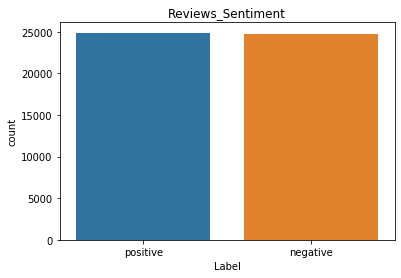

In [13]:
sns.countplot(movie_df['sentiment'])
plt.xlabel('Label')
plt.title('Reviews_Sentiment')

### Data Preprocessing

In [14]:
#we are using stopwords from nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/paul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/paul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
STOPWORDS = stopwords.words('english')
#stemmer    = nltk.SnowballStemmer("english")
wl = WordNetLemmatizer()

In [16]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [17]:
#During analyzing,found that many of the reviews contained HTML tags, numbers, and special characters 
#which do not hold any significant meaning in the review. So below is the function to remove them.

def clean_text_old(text):
    '''
        Make text lowercase, remove text in square brackets,remove links,remove punctuation
        and remove words containing numbers.
    '''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove urls
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [18]:
#function to clean data
def clean_text(text):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    return text

In [19]:
def preprocess_data(text):
    text = clean_text(text)                                                     # Clean puntuation, urls, and so on
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)    # Remove stopwords
    text = ' '.join([wl.lemmatize(word) for word in text.split() if word not in STOPWORDS and word.isalpha()])   
    return text

In [20]:
movie_df['review_prcsd'] = movie_df['review'].apply(preprocess_data)
movie_df[['review_prcsd','sentiment']].head(5)

,review_prcsd,sentiment
0,one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,positive
1,wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many u grown love would laughed one woodys comedy year dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wear prada interesting superman great comedy go see friend,positive
3,basically family little boy jake think zombie closet parent fighting time movie slower soap opera suddenly jake decides become rambo kill zombie ok first going make film must decide thriller drama drama movie watchable parent divorcing arguing like real life jake closet totally ruin film expected see boogeyman similar movie instead watched drama meaningless thriller spot well playing parent descent dialog shot jake ignore,negative
4,petter matteis love time money visually stunning film watch mr mattei offer u vivid portrait human relation movie seems telling u money power success people different situation encounter variation arthur schnitzlers play theme director transfer action present time new york different character meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one get soul picture different stage loneliness one inhabits big city exactly best place human relation find sincere fulfillment one discerns case people encounter acting good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alive wish mr mattei good luck await anxiously next work,positive


## Word Cloud
wordcloud is another helpful visualization tool.Wordcloud package helps to create word clouds by placing words on a canvas randomly, with sizes proportional to their frequency in the text.

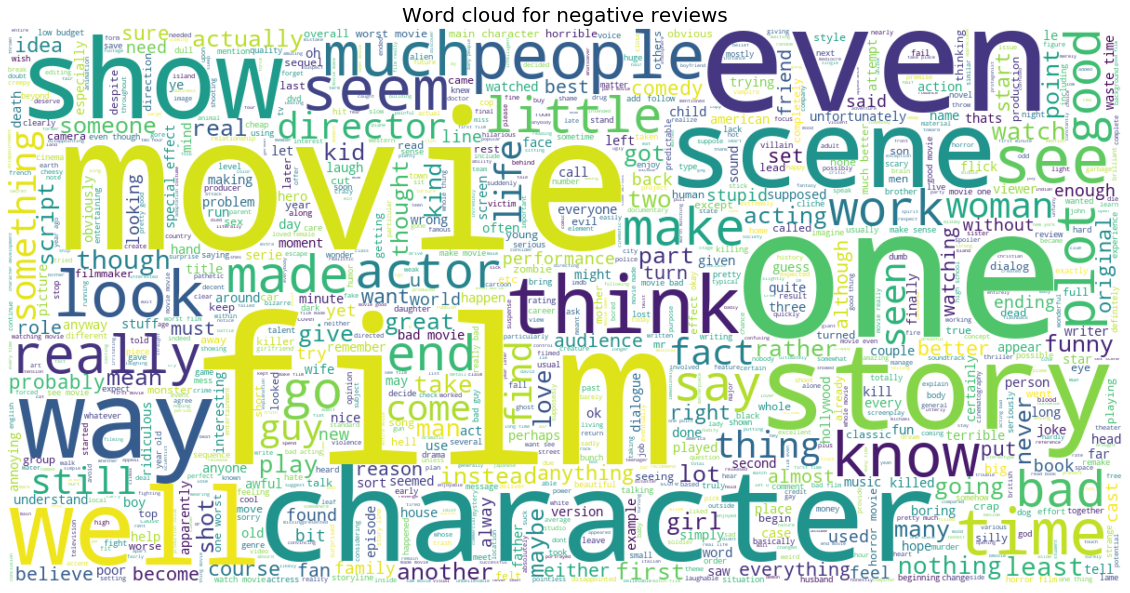

In [21]:
#for negative sentiments
negative_data = movie_df[movie_df.sentiment == 'negative']['review_prcsd']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

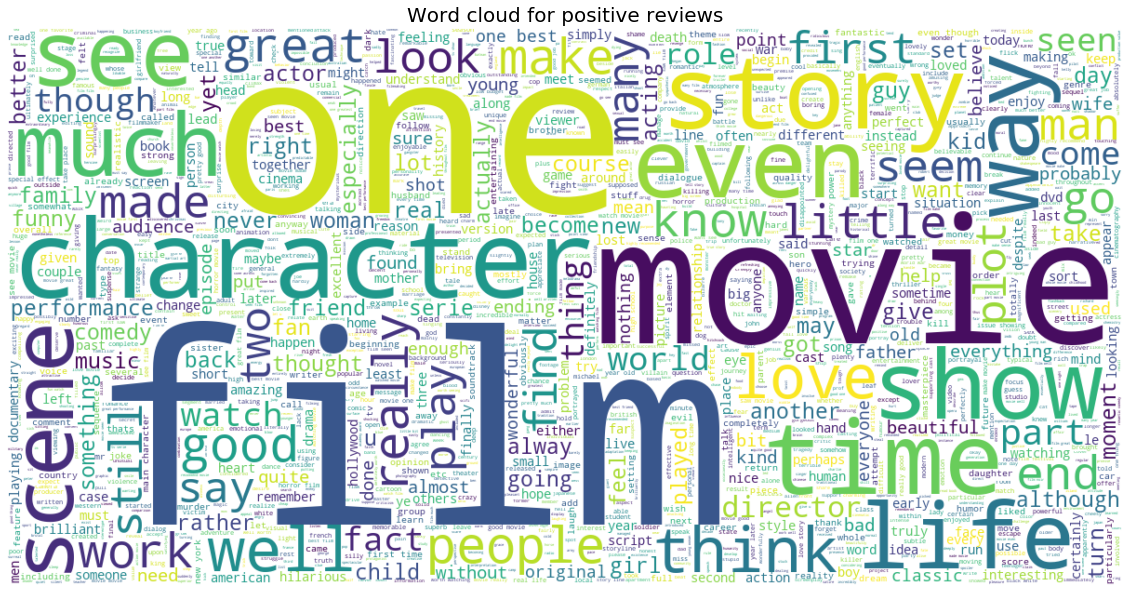

In [22]:
#for positive sentiments
positive_data = movie_df[movie_df.sentiment == 'positive']['review_prcsd']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

### Distribution of words per review for positive and negative sentiment

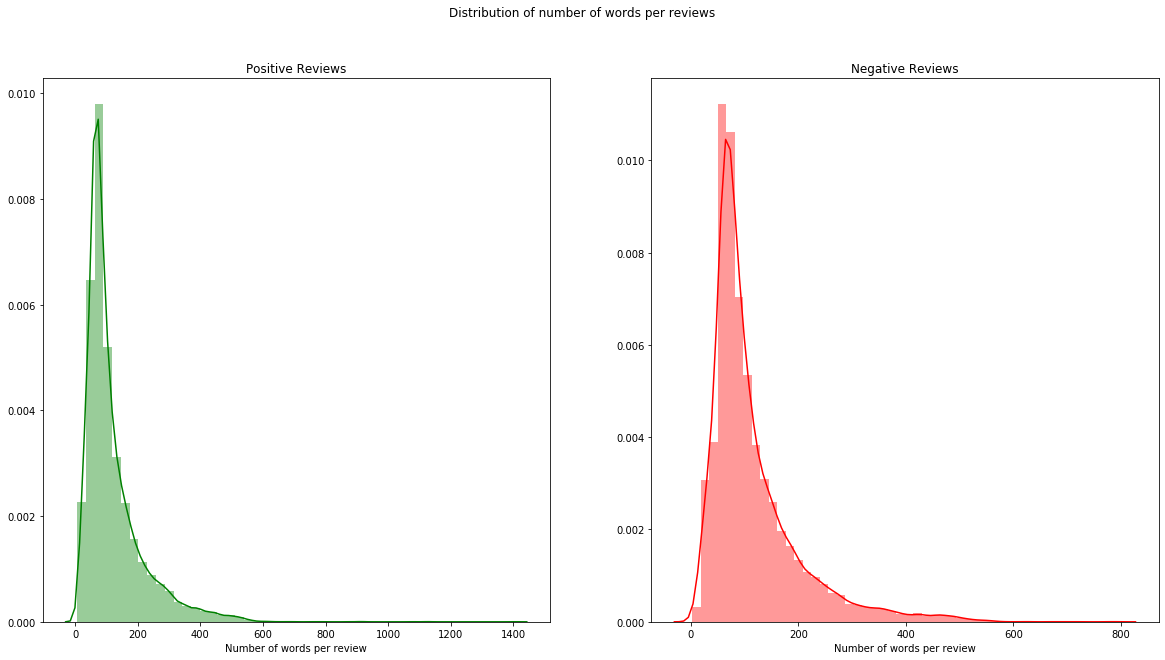

In [23]:
#check the words per reviews and how they are distributed for each sentiments
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

## Top n grams

In [24]:
def get_top_n_gram(corpus, sentiment,  n_gram, top_n=None):
    
    # list of splited senteces, which is just list of words
    text = [word for sent in corpus[corpus['sentiment'] == sentiment]['review_prcsd'] for word in sent.split()]

    grams = ngrams(text, n_gram)
    grams = (' '.join(g) for g in grams)
    num_of_grams = [words for words in grams]
    freq_words = Counter(num_of_grams)
    freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
    freq_words_df = pd.DataFrame(freq_words_sorted[:top_n], columns=['word', 'counts'])
    return freq_words_df[:top_n]

def plot_freq(data, st):
    '''
        take the data, and kind of sentiment
    '''
    plt.figure(figsize=(12, 6))
    sns.barplot(data= data , x= 'counts', y= 'word')
    plt.title(f'Top 20 words in {st} sentiment')
    plt.show();

In [25]:
#bigram for positive sentiment
positive_gram = get_top_n_gram(movie_df, 'positive', 2, 20)
positive_gram.head()

,word,counts
0,one best,1655
1,even though,1062
2,ever seen,957
3,first time,932
4,new york,842


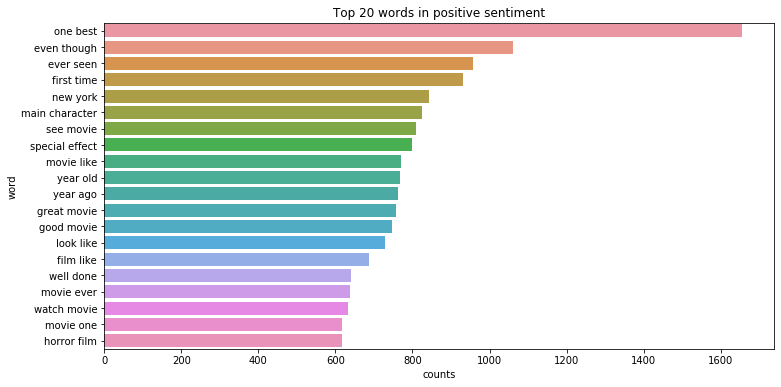

In [26]:
plot_freq(positive_gram, 'positive')

In [27]:
#Bigram for negative sentiment
negative_gram = get_top_n_gram(movie_df, 'negative', 2, 20)
negative_gram.head()

,word,counts
0,look like,2143
1,ever seen,1707
2,special effect,1450
3,waste time,1412
4,movie ever,1313


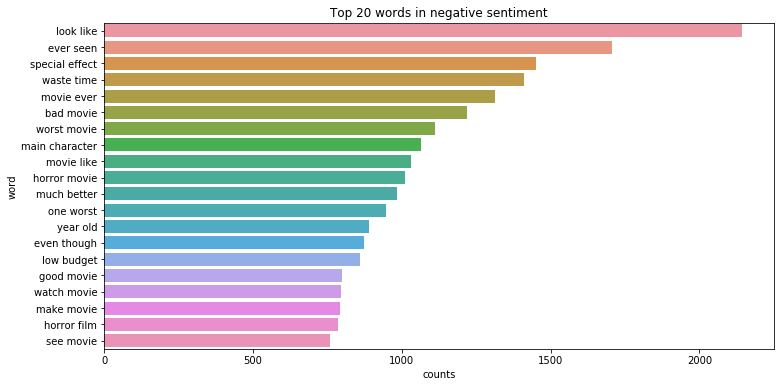

In [28]:
plot_freq(negative_gram, 'negative')

### Check most frequent words in positive and negative sentiment

In [29]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(movie_df.review_prcsd)
corpus[:5]

['one', 'reviewer', 'mentioned', 'watching', 'oz']

In [30]:
counter = Counter(corpus)
most_common = counter.most_common()[:3]
most_common = pd.DataFrame(most_common,columns = ['corpus','count'])
most_common

,corpus,count
0,movie,100605
1,film,91130
2,one,53525


In [31]:
vocab_size= 10000
trun_vocab= [word for word,count in counter.most_common()][:vocab_size]

In [32]:
def freq_sentiment_words(text, sentiment, num):
    '''
        take the whole data, and return data which is have # of words in each sentiment has been passed
    '''
    words = [word for sent in text[text['sentiment'] == sentiment]['review_prcsd'] for word in sent.split()]
    freq_words = Counter(words)
    freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
    freq_words_df = pd.DataFrame(freq_words_sorted[:num], columns=['word', 'counts'])
    return freq_words_df

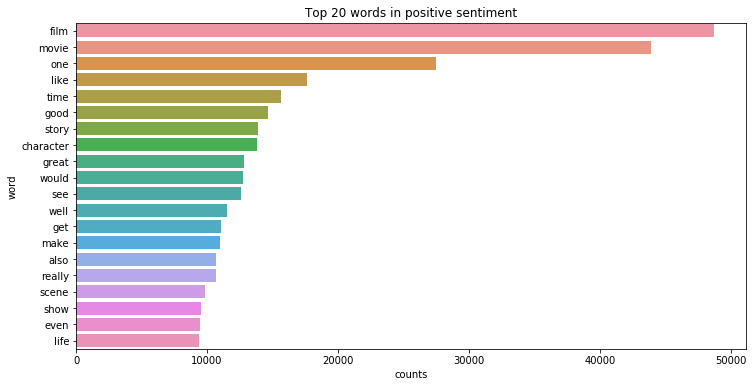

In [40]:
positive_words = freq_sentiment_words(movie_df, 'positive', 20)
plot_freq(positive_words,'positive')

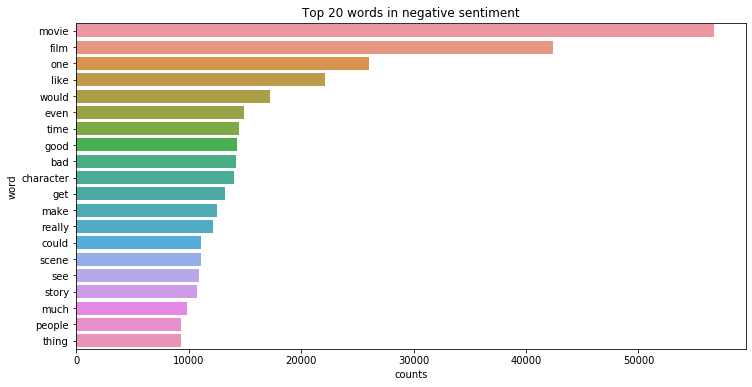

In [41]:
negative_words = freq_sentiment_words(movie_df, 'negative', 20)
plot_freq(negative_words,'negative')

## Split the dataset for training and testing

In [35]:
X= movie_df['review_prcsd']
y = movie_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =9)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((34707,), (34707,), (14875,), (14875,))

In [36]:
#Transform the 'sentiment' to numeric 
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

## Word Embedding
Tokenizer class from the keras.preprocessing.text module to create a word-to-index dictionary. In the word-to-index dictionary, each word in the corpus is used as a key, while a corresponding unique index is used as the value for the key. As we want each review to be of the same length so that it can be fit in the model, we pad it to get all reviews of the same length set the maximum size of each list to 500.

In [37]:
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [38]:
#Get the vocabulary size
num_words = len(tokenizer.word_index) +1
print (num_words)

116979


In [42]:
#We store this tokenizer in a file to use later in web app
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### choose  length of the text sequence

In [44]:

#choice of maximum length of sequences
seq_len_list = [len(i) for i in X_train_seq + X_test_seq]
#
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 293


In [46]:
maxlen=293

In [47]:
data_covered = np.sum(np.array(seq_len_list) < maxlen) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(data_covered,2)))

The above calculated number coveres approximately 94.51 % of data


In [49]:
X_train_pseq = pad_sequences(X_train_seq, padding='post',maxlen = maxlen)
X_test_pseq = pad_sequences(X_test_seq, padding='post',maxlen = maxlen)

## Design the model

In [50]:
epochs = 10
batch_size=32

In [53]:
model = Sequential()
model.add(Embedding(num_words, 64, input_length=maxlen))
model.add(Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.2)))
model.add(Dense(64,input_dim=256))
model.add(dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           9176384   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 9,374,273
Trainable params: 9,374,273
Non-trainable params: 0
_________________________________________________________________


In [51]:
#Earlystoping method from Keras to stop the training process when we get the minimum validation loss
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5,min_delta=0.0001)

In [55]:
history=model.fit(X_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 validation_data=[X_test, y_test],
 callbacks=[es])

/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 34707 samples, validate on 14875 samples
Epoch 1/10
34707/34707 [==============================] - 500s 14ms/step - loss: 0.4247 - accuracy: 0.8134 - val_loss: 0.3112 - val_accuracy: 0.8763
Epoch 2/10
34707/34707 [==============================] - 500s 14ms/step - loss: 0.2076 - accuracy: 0.9255 - val_loss: 0.3120 - val_accuracy: 0.8682
Epoch 3/10
34707/34707 [==============================] - 500s 14ms/step - loss: 0.1183 - accuracy: 0.9605 - val_loss: 0.3690 - val_accuracy: 0.8704
Epoch 4/10
34707/34707 [==============================] - 500s 14ms/step - loss: 0.0756 - accuracy: 0.9759 - val_loss: 0.3985 - val_accuracy: 0.8581
Epoch 5/10
34707/34707 [==============================] - 499s 14ms/step - loss: 0.0624 - accuracy: 0.9797 - val_loss: 0.4257 - val_accuracy: 0.8591
Epoch 6/10
34707/34707 [==============================] - 500s 14ms/step - loss: 0.0342 - accuracy: 0.9900 - val_loss: 0.5643 - val_accuracy: 0.8693
Epoch 00006: early stopping


In [57]:
model.save('movie_sent_blstm.h5')

### Model with GRU layer

In [60]:
epochs=5
embed_dim=128

In [62]:
model1 = Sequential()
model1.add(Embedding(num_words,embed_dim,input_length=maxlen))
model1.add(GRU(128,return_sequences=True))
model1.add(GRU(128))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 293, 128)          14973312  
_________________________________________________________________
gru_5 (GRU)                  (None, 293, 128)          98688     
_________________________________________________________________
gru_6 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 15,170,817
Trainable params: 15,170,817
Non-trainable params: 0
_________________________________________________________________


In [63]:
history=model1.fit(X_train_pseq, y_train,
 batch_size=batch_size,
 epochs=epochs,
 validation_data=[X_test_pseq, y_test],
 callbacks=[es])

/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 34707 samples, validate on 14875 samples
Epoch 1/5
34707/34707 [==============================] - 369s 11ms/step - loss: 0.6935 - accuracy: 0.4990 - val_loss: 0.6929 - val_accuracy: 0.5071
Epoch 2/5
34707/34707 [==============================] - 369s 11ms/step - loss: 0.6858 - accuracy: 0.5103 - val_loss: 0.6948 - val_accuracy: 0.5057
Epoch 3/5
34707/34707 [==============================] - 373s 11ms/step - loss: 0.6944 - accuracy: 0.5121 - val_loss: 0.6936 - val_accuracy: 0.5107
Epoch 4/5
34707/34707 [==============================] - 369s 11ms/step - loss: 0.6895 - accuracy: 0.5170 - val_loss: 0.6912 - val_accuracy: 0.5153
Epoch 5/5
34707/34707 [==============================] - 371s 11ms/step - loss: 0.6812 - accuracy: 0.5245 - val_loss: 0.6949 - val_accuracy: 0.5008


Not giving expected accuracy

In [ ]:
#model1.save('movie_sent_gru.h5')

### Model with Conv1D layer with BLSTM

In [68]:
epochs=10

In [67]:
model2 = Sequential()
model2.add(Embedding(num_words, 64, input_length=maxlen))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Bidirectional(LSTM(128, return_sequences=True)))
model2.add(LSTM(64))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 293, 64)           7486656   
_________________________________________________________________
batch_normalization_6 (Batch (None, 293, 64)           256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 293, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 293, 32)           6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 146, 32)           0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 146, 32)           128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 146, 32)          

In [69]:
history=model2.fit(X_train_pseq, y_train,
 batch_size=batch_size,
 epochs=epochs,
 validation_data=[X_test_pseq, y_test],
 callbacks=[es])

/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 34707 samples, validate on 14875 samples
Epoch 1/10
34707/34707 [==============================] - 231s 7ms/step - loss: 0.6957 - accuracy: 0.5059 - val_loss: 0.7555 - val_accuracy: 0.5130
Epoch 2/10
34707/34707 [==============================] - 229s 7ms/step - loss: 0.6270 - accuracy: 0.6228 - val_loss: 0.3769 - val_accuracy: 0.8408
Epoch 3/10
34707/34707 [==============================] - 229s 7ms/step - loss: 0.3232 - accuracy: 0.8686 - val_loss: 0.2814 - val_accuracy: 0.8818
Epoch 4/10
34707/34707 [==============================] - 229s 7ms/step - loss: 0.2281 - accuracy: 0.9151 - val_loss: 0.2772 - val_accuracy: 0.8848
Epoch 5/10
34707/34707 [==============================] - 229s 7ms/step - loss: 0.1802 - accuracy: 0.9359 - val_loss: 0.3003 - val_accuracy: 0.8836
Epoch 6/10
34707/34707 [==============================] - 228s 7ms/step - loss: 0.1375 - accuracy: 0.9529 - val_loss: 0.3133 - val_accuracy: 0.8805
Epoch 7/10
34707/34707 [==============================] - 228s

In [75]:
y_pred = model2.predict(X_test_pseq)

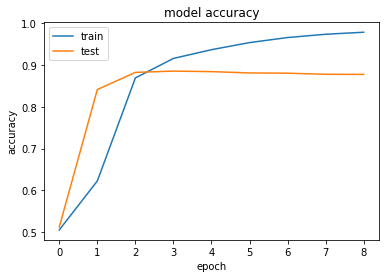

In [76]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

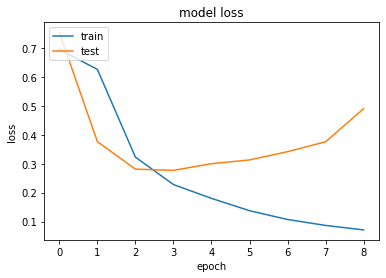

In [77]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
#setting threshold as 0.6
y_preds = y_pred > 0.6
y_preds = np.where(y_preds == True, 1, 0)
y_preds.shape

(14875, 1)

In [79]:
print('Classification report:\n %s' % (classification_report(y_test, y_preds)))

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      7401
           1       0.87      0.89      0.88      7474

    accuracy                           0.88     14875
   macro avg       0.88      0.88      0.88     14875
weighted avg       0.88      0.88      0.88     14875



In [73]:
#We save this model so that we can use in own web app

model2.save('movie_sent.h5')

## Predict for new reviews

In [71]:
rev_string="It is a total waste of time. I really dont recommend anyone this movie"
x_1=tokenizer.texts_to_sequences([rev_string])
x_1 = pad_sequences(x_1,maxlen=maxlen)
model2.predict(x_1)

array([[0.12382542]], dtype=float32)

In [72]:
rev_string="This Was Fun Welcome back Marvel oh how we missed you. Florence Pugh as Yelena is just fantastic"
x_2=tokenizer.texts_to_sequences([rev_string])
x_2 = pad_sequences(x_2,maxlen=maxlen)
model2.predict(x_2)

array([[0.99573565]], dtype=float32)

I have covered only the deep learning algorithm for this assignment purpose.